In [1]:
# %matplotlib qt

In [2]:
import matplotlib.pyplot as plt
import spartan2.spartan as st

In [6]:
'''
load time data
@param name: name of the time_series data file
@param path: father path of data file
@param col_types: type of columns of data
@hasvalue: In time_series data, this means whether data include time dimension
    if True, first column of data will be regarded as time dimension defaultly
    if False, time dimension will be initiated by the length of data and the frequency param
'''
data = st.loadTensor(name = "example_time", path = "inputData/", col_types = [float, float, float], hasvalue=True)

Info: Tensor is loaded
           ----------------------
             attr     |	2
             values   |	True
             nonzeros |	36000



In [7]:
'''
transfer data to time-series type
@params attrlabels: labels for each dimension
@params numsensors: number of signal dimension [except time dimension]
@params freq: frequency of the signal, default is None
    if time dimension is not provided, this parameter is needed to initiate time dimension
    if time dimension is provided, freq will not work and will be calculated by the time sequence
@param startts: start timestamp, default is None
    if time dimension is not provided, this parameter is needed to initiate time dimension
    if time dimension is provided, startts will not work and will be calculated by the time sequence
'''
time_series = data.toTimeseries(attrlabels=['ecg_low', 'ecg_high'])

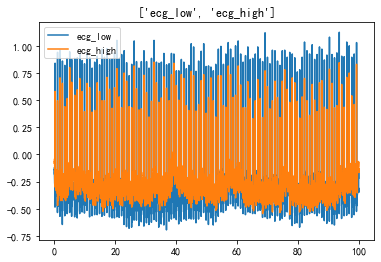

In [5]:
'''
draw series data with matplotlib.pyplot
@type chosen_labels: [[]]
@param chosen_labels:
    if None, draw all the attrs in subgraph;
    or treat all 1-dimen array as subgraphs and entries in each array as lines in each subgraph
'''
time_series.show(chosen_labels=[['ecg_low', 'ecg_high']])

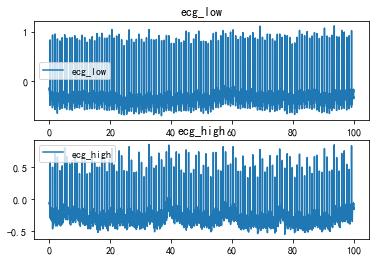

36000

In [6]:
time_series.show()
time_series.length

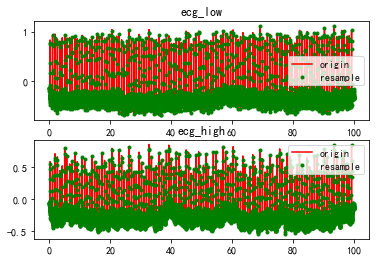

180

In [7]:
''' 
resample series data with a new frequency, acomplish on the basis of scipy.signal.sample
@param resampled_freq: resampled frequency
@param show: if True, show the resampled signal with matplotlib.pyplot
@param inplace:
    if True, update origin object's variable
    if False, return a new STTimeseries object
'''
resampled_time_series = time_series.resample(180, show=True)
resampled_time_series.freq

In [8]:
resampled_time_series.resample(360, inplace=True)
resampled_time_series.length, resampled_time_series.freq, len(resampled_time_series.timelist)

(36000, 360, 36000)

In [9]:
time_series.freq, resampled_time_series.copy().freq

(360, 360)

In [10]:
'''
combine series data which have the same frequency, can be a single STTimeseries object or a list of STTImeseries objects
@param combined_series: series to be combined
@param inplace:
    if True, update origin object's variable
    if False, return a new STTimeseries object
'''
new_series = time_series.combine(resampled_time_series, inplace=False)
new_series.length, new_series.attrlabels

(36000, ['ecg_low', 'ecg_high', 'ecg_low_1', 'ecg_high_1'])

In [11]:
new_series.combine(time_series, inplace=True)
new_series.length, new_series.attrlabels

(36000,
 ['ecg_low', 'ecg_high', 'ecg_low_1', 'ecg_high_1', 'ecg_low_2', 'ecg_high_2'])

In [12]:
'''
save current time series object as a tensor file, time column [if exists] shall always be stored as the first column
@param name: name of the file to be saved
@param path: default is None, parent directory
@param attr: default is None
    if assigned, only save required columns
@param annotation: annotations which will be saved at the first line of the file
@param time: default is True, save time dimension
'''
new_series.savefile('test', path='.//inputData//', attrs=['ecg_low_1', 'ecg_low_2'], annotation='this is a test')

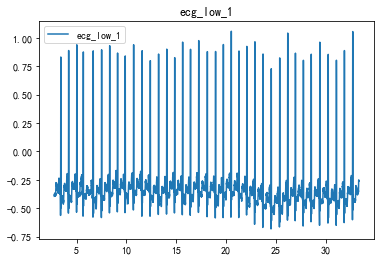

In [13]:
'''
cut columns in time dimension
@type attrs: array
@param attrs: default is None, columns to be cut
    if not None, attr sprcified in attrs will be cut AND param inplace will be invalid
@param start: default is None, start position
    if start is None, cut from the very front position
@param end: default is None, end position
    if end is None, cut to the very last position
@param form: default is point, type of start and end
    if "point", start and end would mean absolute positions of columns
    if "time", start and end would mean timestamp and need to multiply frequenct to get the absolute positions
@param inplace: default if False, IF attrs is not None, this param will be invalid
    if False, function will return a new STTimeseiries object
    if True, function will make changes in current STTimeseries object
'''
cut_series = new_series.cut(attrs=['ecg_low_1'], start=1000, end=12000)
cut_series.show()

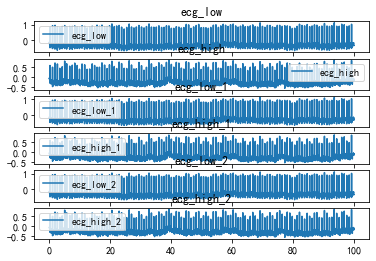

In [14]:
new_series.show()
new_series.cut(start=40, end=60, form='time', inplace=True)

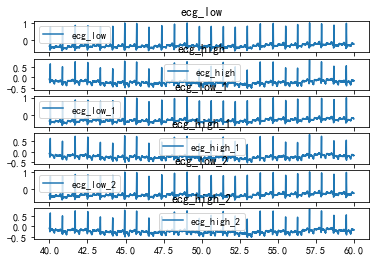

In [15]:
new_series.show()